In [37]:
import os
import io
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from PIL import Image
from argparse import Namespace
from collections import defaultdict
from env.VRPInstance import VRPInstance
from env.utils import load_scores, sort_instances
from tensorboard.backend.event_processing import event_accumulator

In [38]:
# Baseline
VNS_heuristic_scores = {
    "E-n22-k4.evrp": 384.67,
    "E-n23-k3.evrp": 571.94,
    "E-n30-k3.evrp": 509.47,
    "E-n33-k4.evrp": 840.14,
    "E-n51-k5.evrp": 529.90,
    "E-n76-k7.evrp": 692.64,
    "E-n101-k8.evrp": 839.29,
    "X-n143-k7.evrp": 16028.05,
    "X-n214-k11.evrp": 11323.56,
    "X-n351-k40.evrp": 27064.88,
    "X-n459-k26.evrp": 25370.80,
    "X-n573-k30.evrp": 52181.51,
    "X-n685-k75.evrp": 71345.40,
    "X-n749-k98.evrp": 81002.01,
    "X-n819-k171.evrp": 164289.95,
    "X-n916-k207.evrp": 341649.91,
    "X-n1001-k43.evrp": 77476.36
}

In [39]:
def compute_gap(scores):
    gaps = []
    for name, score in scores.items():
        baseline_score = VNS_heuristic_scores[name]
        gap = (baseline_score - score) / baseline_score
        gaps.append(gap)
    average_gap = np.mean(gaps)
    return average_gap

In [40]:
def read_tensorboard_event(folder):
    for file in os.listdir(folder):
        if "events" in file:
            event = event_accumulator.EventAccumulator(os.path.join(folder, file))
            event.Reload()
            return event

In [41]:
def load_all_scores(log_folder, seeds):
    data = defaultdict(list)
    for seed in seeds:
        folder = f"{log_folder}/seed_{seed}"
        data["Folder"].append(folder)
        event = read_tensorboard_event(folder)
        steps = event.Scalars("steps")
        running_time = steps[-1].wall_time - steps[0].wall_time
        keys = sort_instances(VNS_heuristic_scores.keys())
        for key in keys:
            scores = [x.value for x in event.Scalars(f"scores/{key}")]
            data[key].append(scores)
        data["Running Time"].append(round(running_time, 2))
    df = pd.DataFrame(data).set_index(["Folder", "Running Time"])
    return df

In [42]:
def plotly_fig2array(fig):
    fig_bytes = fig.to_image(format="png")
    buf = io.BytesIO(fig_bytes)
    img = Image.open(buf)
    return np.asarray(img)

In [43]:
def instance_fig(df, key):
    best_folder, _ = df[key].idxmin()
    solution = load_scores(best_folder)[key].solution
    args = Namespace(round_int=False, algo=None)
    instance = VRPInstance.from_path(f"dataset/train/data_evrp_wcci/{key}", args, f"sub_{key}")
    instance.solution = solution
    fig = instance.plot()
    return fig

In [44]:
vrp_hgs_df = load_all_scores("logs/dataset_train_data_evrp_wcci_HGS_0.1", range(1, 21))
vrp_hgs_best_score = vrp_hgs_df.applymap(lambda x: min(x))
vrp_hgs_best_score.round(2)

,,E-n22-k4.evrp,E-n23-k3.evrp,E-n30-k3.evrp,E-n33-k4.evrp,E-n51-k5.evrp,E-n76-k7.evrp,E-n101-k8.evrp,X-n143-k7.evrp,X-n214-k11.evrp,X-n351-k40.evrp,X-n459-k26.evrp,X-n573-k30.evrp,X-n685-k75.evrp,X-n749-k98.evrp,X-n819-k171.evrp,X-n916-k207.evrp,X-n1001-k43.evrp
Folder,Running Time,,,,,,,,,,,,,,,,,
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_1,4777.06,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15878.51,11028.42,26293.91,24350.38,51330.11,69170.05,79009.12,159688.03,334086.75,74097.05
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_2,4772.09,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15878.51,10991.83,26291.86,24401.30,51232.97,69162.17,78939.77,159664.28,334807.97,74777.23
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_3,4788.85,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15877.54,11036.21,26222.71,24359.53,51323.75,69196.68,78797.03,159395.98,334195.25,74516.71
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_4,4840.70,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15878.51,11047.12,26279.33,24429.31,51335.80,69110.27,78895.02,159686.30,334421.69,74160.61
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_5,4717.08,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15865.50,11019.99,26272.97,24317.28,51322.11,69169.17,78914.96,159519.48,334786.44,74571.19
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_6,4629.20,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15878.51,11011.42,26259.59,24492.69,51600.76,69206.54,79004.20,159803.08,334728.62,74618.63
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_7,4876.17,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15880.76,11038.62,26325.95,24337.67,51591.29,69201.73,78955.23,159459.50,334664.84,74504.76
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_8,4933.96,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15880.76,11032.83,26172.75,24333.78,51346.73,69109.19,78747.83,159705.72,334729.09,74674.16
logs/dataset_train_data_evrp_wcci_HGS_0.1/seed_9,4885.77,386.96,581.07,509.47,840.15,529.9,692.64,839.0,15880.76,11015.89,26256.65,24426.62,51396.84,69071.38,79012.54,159763.58,334281.84,74612.07


In [45]:
vrp_vns_df = load_all_scores("logs/dataset_train_data_evrp_wcci_VNS_0.1", range(1, 13))
vrp_vns_best_score = vrp_vns_df.applymap(lambda x: min(x))
vrp_vns_best_score.round(2)

,,E-n22-k4.evrp,E-n23-k3.evrp,E-n30-k3.evrp,E-n33-k4.evrp,E-n51-k5.evrp,E-n76-k7.evrp,E-n101-k8.evrp,X-n143-k7.evrp,X-n214-k11.evrp,X-n351-k40.evrp,X-n459-k26.evrp,X-n573-k30.evrp,X-n685-k75.evrp,X-n749-k98.evrp,X-n819-k171.evrp,X-n916-k207.evrp,X-n1001-k43.evrp
Folder,Running Time,,,,,,,,,,,,,,,,,
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_1,9183.20,384.68,571.95,509.47,840.15,541.94,692.64,839.00,16037.76,11309.37,26853.02,25015.06,51823.00,70043.21,80119.60,161941.20,336324.34,76351.56
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_2,9194.62,384.68,571.95,509.47,840.15,541.94,692.64,839.00,15997.71,11274.34,26839.17,25008.02,52097.23,70270.48,79794.26,161900.12,336862.69,76978.01
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_3,9191.35,384.68,571.95,509.47,840.15,543.39,696.27,839.00,15919.31,11152.30,26696.94,25068.13,51793.85,70461.38,80144.25,162106.39,336852.41,76625.07
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_4,9219.96,384.68,571.95,509.47,840.15,543.39,696.27,835.39,16181.16,11386.05,26810.39,24905.69,51970.61,70584.38,80175.58,162164.83,337364.94,76866.72
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_5,9082.87,384.68,571.95,509.47,840.15,543.39,692.64,840.89,16208.45,11202.09,26703.10,25074.63,52056.21,70353.97,80014.86,162044.30,336451.91,76343.77
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_6,9183.91,384.68,571.95,509.47,840.15,543.39,692.64,839.00,16103.68,11318.19,26867.72,25025.99,51832.54,70237.95,80101.05,162132.58,336569.09,76454.80
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_7,9291.27,384.68,571.95,509.47,840.15,543.39,696.27,839.00,16056.97,11335.75,26847.94,24932.61,51865.32,70540.60,80315.84,162253.00,336101.12,76792.38
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_8,9098.14,384.68,571.95,509.47,840.15,541.94,692.64,842.32,16135.72,11279.25,26812.15,25066.76,51973.60,70363.23,80106.66,162239.86,336429.97,76274.60
logs/dataset_train_data_evrp_wcci_VNS_0.1/seed_9,9299.28,384.68,571.95,509.47,840.15,543.39,692.64,839.00,16005.41,11301.21,26865.80,25151.73,51678.67,70353.16,80200.55,162000.34,335911.84,76145.36


In [133]:
hgs_running_time = np.mean(vrp_hgs_df.index.get_level_values("Running Time"))/3600
vns_running_time = np.mean(vrp_vns_df.index.get_level_values("Running Time"))/3600
print(f"HGS running time = {hgs_running_time:.2f}h")
print(f"VNS running time = {vns_running_time:.2f}h")

HGS running time = 1.28h
VNS running time = 2.55h


In [134]:
hgs_gap = defaultdict(list)
n = max(vrp_hgs_df.applymap(lambda x: len(x)).max())
for i in range(n):
    score_df = vrp_hgs_df.applymap(lambda x: min(x[:i+1])).min()
    gap = compute_gap(score_df)
    hgs_gap["HGS gap"].append(gap)
    hgs_gap["Running Time"].append((i+1)*hgs_running_time/n)
hgs_gap = pd.DataFrame(hgs_gap)

In [135]:
vns_gap = defaultdict(list)
n = max(vrp_vns_df.applymap(lambda x: len(x)).max())
for i in range(n):
    score_df = vrp_vns_df.applymap(lambda x: min(x[:i+1])).min()
    gap = compute_gap(score_df)
    vns_gap["VNS gap"].append(gap)
    vns_gap["Running Time"].append((i+1)*vns_running_time/n)
vns_gap = pd.DataFrame(vns_gap)

In [156]:
print(f"HGS gap: {hgs_gap.max()['HGS gap']*100:.2f}%")
print(f"VNS gap: {vns_gap.max()['VNS gap']*100:.2f}%")

HGS gap: 1.59%
VNS gap: 0.76%


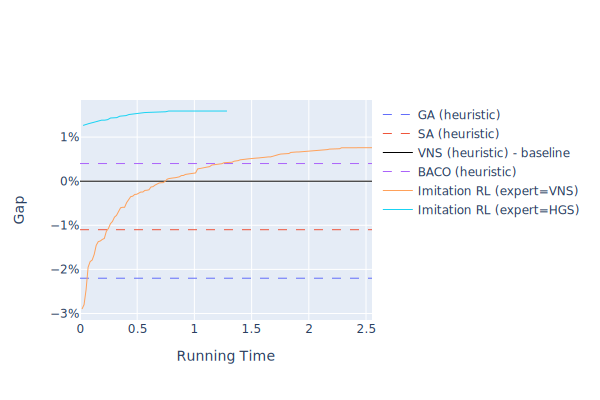

In [147]:
fig = go.Figure()
fig.add_scatter(x=[0, vns_running_time], y=[-0.022, -0.022], name="GA (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[-0.011, -0.011], name="SA (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[0, 0], name="VNS (heuristic) - baseline", mode="lines", line=dict(color='black', width=1))
fig.add_scatter(x=[0, vns_running_time], y=[0.004, 0.004], name="BACO (heuristic)", mode="lines", line=dict(dash='dash', width=1))
fig.add_scatter(x=vns_gap["Running Time"], y=vns_gap["VNS gap"], name="Imitation RL (expert=VNS)", line=dict(width=1))
fig.add_scatter(x=hgs_gap["Running Time"], y=hgs_gap["HGS gap"], name="Imitation RL (expert=HGS)", line=dict(width=1))
fig.update_layout(xaxis_title="Running Time", xaxis_dtick=0.5, yaxis_title="Gap", yaxis_tickformat=",.0%", width=600, height=400)
fig.show("svg")

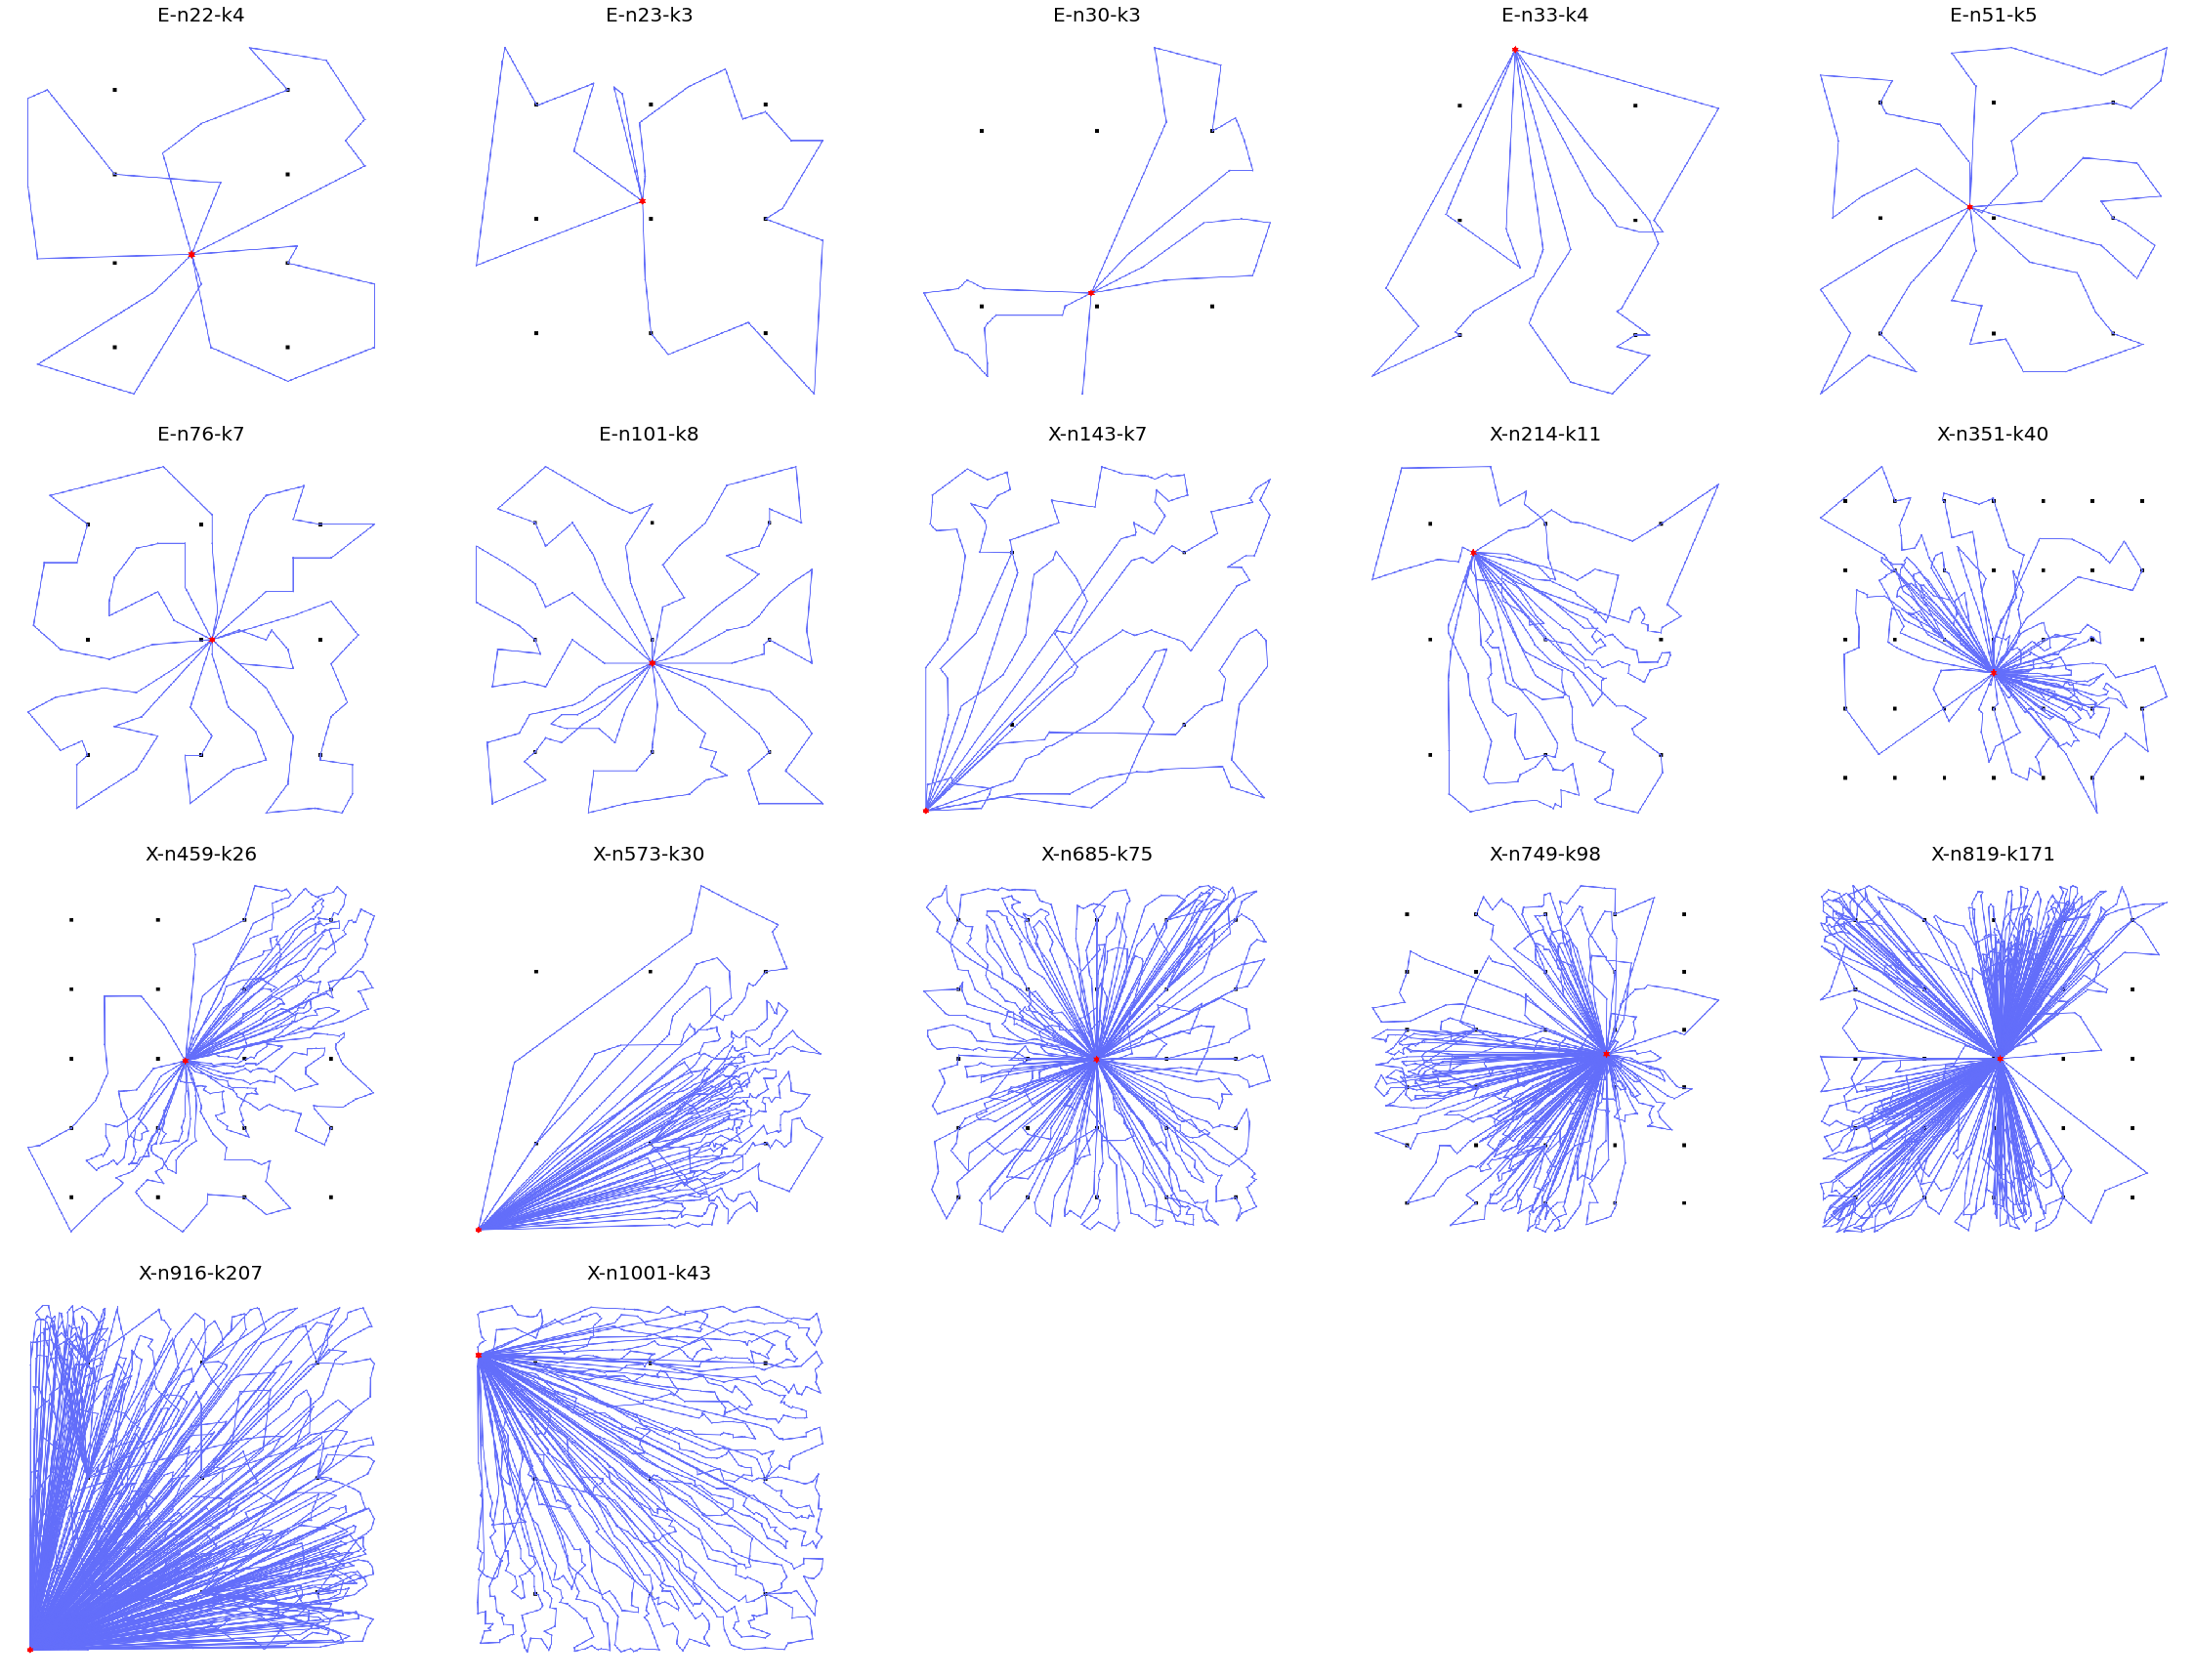

In [150]:
os.makedirs("graphs/dataset_train_data_evrp_wcci_HGS_0.1", exist_ok=True)
fig = plt.figure(figsize=(32, 24))
for i, key in enumerate(sort_instances(VNS_heuristic_scores.keys())):
    plotly_fig = instance_fig(vrp_hgs_best_score, key)
    img = plotly_fig2array(plotly_fig)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_HGS_0.1/{key}.pdf")
    fig.add_subplot(4, 5, i+1)
    plt.title(key.split(".")[0], fontsize=20)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
fig.tight_layout()
plt.show()

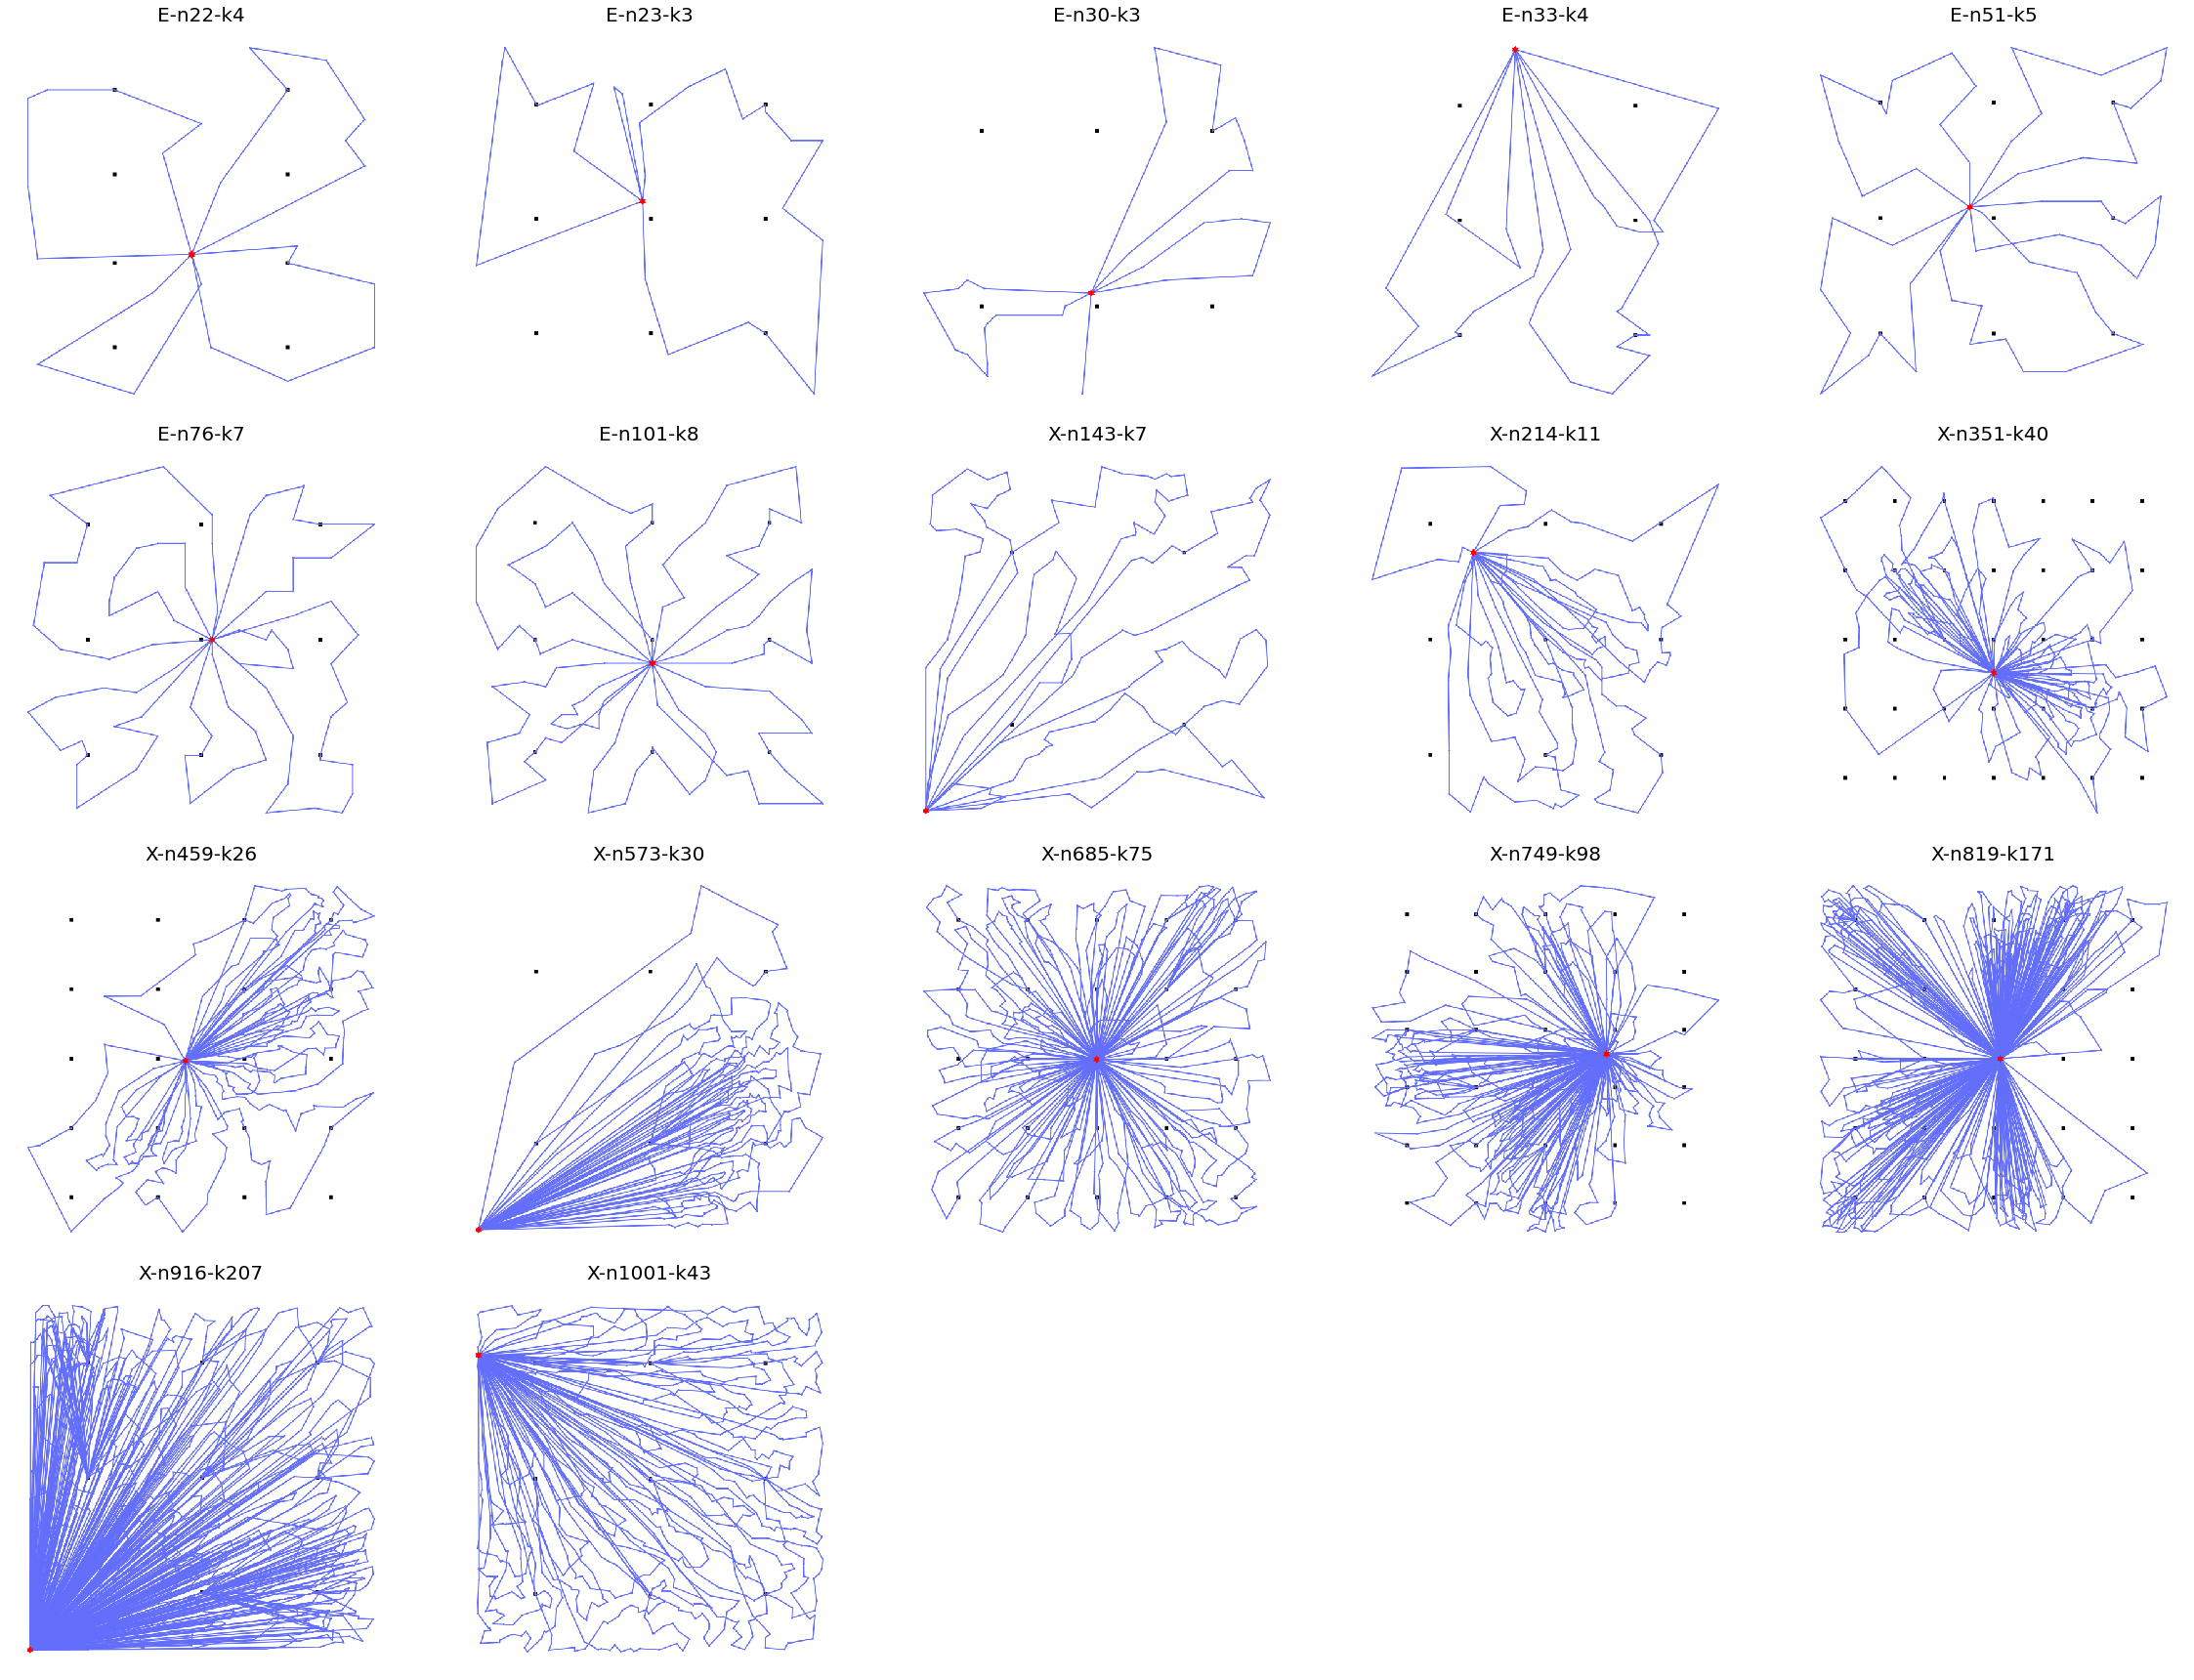

In [151]:
os.makedirs("graphs/dataset_train_data_evrp_wcci_VNS_0.1", exist_ok=True)
fig = plt.figure(figsize=(32, 24))
for i, key in enumerate(sort_instances(VNS_heuristic_scores.keys())):
    plotly_fig = instance_fig(vrp_vns_best_score, key)
    img = plotly_fig2array(plotly_fig)
    plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_VNS_0.1/{key}.pdf")
    fig.add_subplot(4, 5, i+1)
    plt.title(key.split(".")[0], fontsize=20)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
fig.tight_layout()
plt.show()